In [61]:
#IMPORT NECESSARY LIBRARIES

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
irisdf=pd.read_csv("Iris.csv") # IMPORT IRIS DATASET

In [64]:
irisdf

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [65]:
irisdf.drop(axis=1,columns='Id',inplace=True) # DROPPING ID COLUMN BECAUSE IT IS USELESS

In [66]:
irisdf

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [67]:
# CHECK WHICH PROPERIES ARE SUITABLE TO USE FOR CLUSTERING 

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

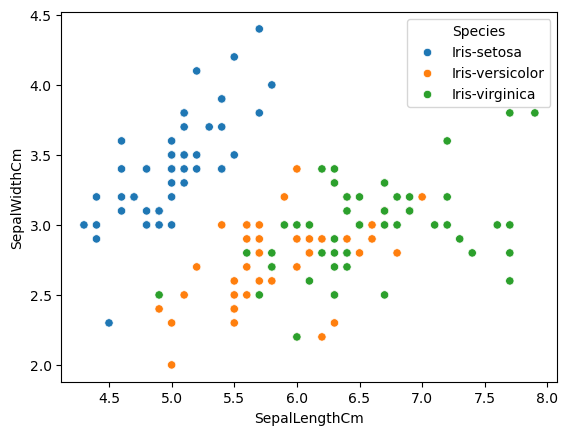

In [68]:
sns.scatterplot(irisdf,x='SepalLengthCm',y='SepalWidthCm',hue='Species') # THESE PROPERTIES DID NO T SHOW PROPER DIFFERENTIATION BETWEEN SPECIES

<Axes: xlabel='PetalWidthCm', ylabel='PetalLengthCm'>

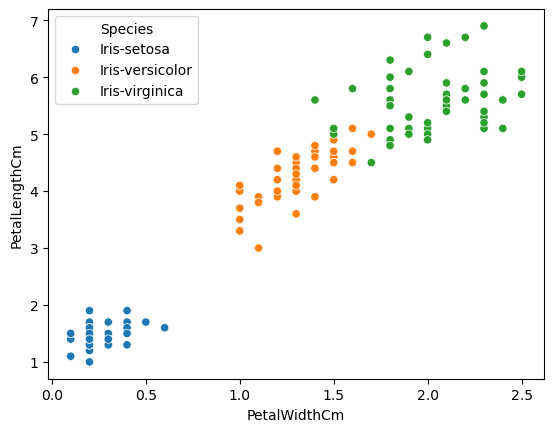

In [79]:
sns.scatterplot(irisdf,x='PetalWidthCm',y='PetalLengthCm',hue='Species')  # THESE PROPERTIES ARE SUITABLE FOR CLUSTURING ALGORITHM

In [ ]:
#SCALING THE DATA BEFORE APPLYING THE K-MEANS ALGORITHM IS IMPORTANT BECAUSE K-MEANS CALCULATES DISTANCES BETWEEN POINTS. 

In [81]:
from sklearn.preprocessing import StandardScaler

In [83]:
scaler = StandardScaler()

In [85]:
numerical_features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

In [87]:
scaled_df=scaler.fit_transform(irisdf[numerical_features])

In [89]:
scaled_df = pd.DataFrame(scaled_df,columns=numerical_features)

In [91]:
scaled_df['Species']=irisdf['Species']

<Axes: xlabel='PetalWidthCm', ylabel='PetalLengthCm'>

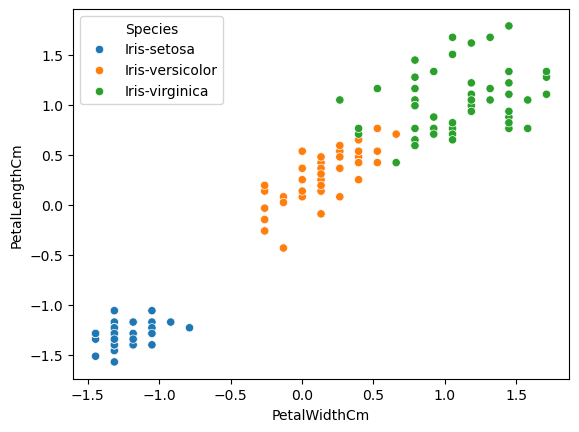

In [93]:
sns.scatterplot(scaled_df,x='PetalWidthCm',y='PetalLengthCm',hue='Species')

In [ ]:
#WE CAN SEE THAT EVENTHOUGH WE SCALED THE DATA , THERE IS NO CHANGE IN DISTANCE BETWEEN THE DATAPOINTS
#NOW WE WILL IMPLEMENT THE ACTUAL K MEANS ALGORITHM 

In [ ]:
#IMPORT K MEANS FOR SKLEARN

In [15]:
from sklearn.cluster import KMeans

In [16]:
Kmeans=KMeans(n_clusters=3) #WE TAKE n_clusters=3 BECAUSE WE HAVE TO CATAGORIZE THE DATAPOINTS INTO 3 SPECIES i.e, 3 CLUSTERS

In [17]:
Kmeans.fit(irisdf[['PetalLengthCm', 'PetalWidthCm']])

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [18]:
Kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
#LET'S MAKE A COLUMN "K SPECIES" WHICH IS THE PREDICTED CLUSTERS BY THE ALGORITHM

In [19]:
irisdf["K Species"]=Kmeans.labels_

In [ ]:
#NOW LET'S VISUALIZE PREDICTED CLUSTERS(K SPECIES COLUMN) AND THE REAL CLUSTERS(SPECIES COLUMN)

<Axes: xlabel='PetalWidthCm', ylabel='PetalLengthCm'>

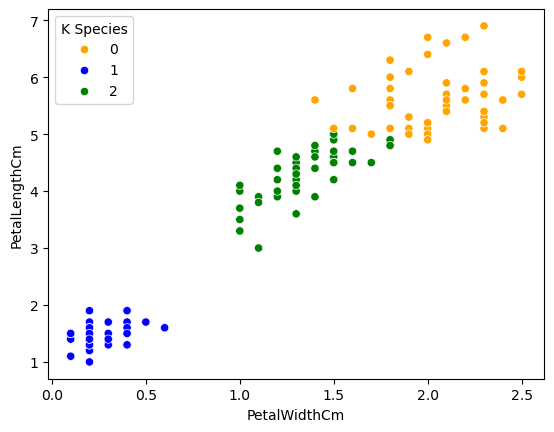

In [20]:
sns.scatterplot(irisdf,x='PetalWidthCm',y='PetalLengthCm',hue='K Species',palette=['orange', 'blue', 'green'])

<Axes: xlabel='PetalWidthCm', ylabel='PetalLengthCm'>

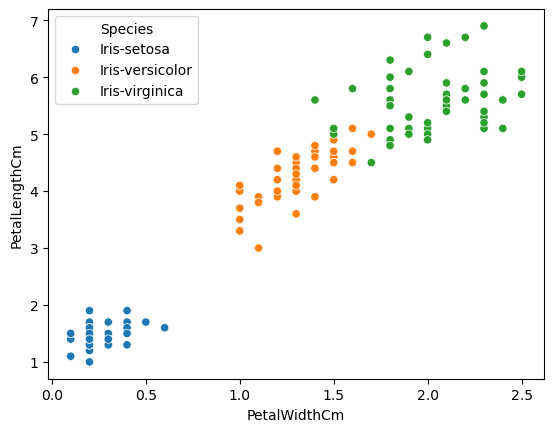

In [21]:
sns.scatterplot(irisdf,x='PetalWidthCm',y='PetalLengthCm',hue='Species')

In [ ]:
#PREDICTED CLUSTERS ARE ALMOST SIMILAR TO THE REAL CLUSTERS MEANS THAT OUR ALGORITHM PERFORMED WELL.
#NOW LETS EVALUATE THE PERFORMANCE OF THE ALGORITHM USING CLASSIFICATION REPORT AND CONFUSION MATRIX.

In [43]:
#FIRST , CONVERT SPECIES COLUMN INTO 0's AND 1's AND 2's TO COMPARE WITH K SPECIES COLUMN
def fun(str):
    if (str=="Iris-setosa"):
        return 1
    elif (str == "Iris-virginica"):
        return 0
    else :
        return 2
irisdf['Species']=irisdf['Species'].apply(fun)

In [ ]:
#IMPORT NECESSARY LIBRARIES

In [45]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
#PRINT CLASSIFICATION REPORT AND CONFUSION MATRIX

In [49]:
print(classification_report(irisdf['Species'],Kmeans.labels_))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92        50
           1       1.00      1.00      1.00        50
           2       0.89      0.96      0.92        50

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



In [51]:
print(confusion_matrix(irisdf['Species'],irisdf['K Species']))

[[44  0  6]
 [ 0 50  0]
 [ 2  0 48]]
